# Do transformations for getting better predictions of profit andmake a table containing R^2 value for each prepared model.


"""R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years"""





In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


In [2]:
# Reading the Data

df=pd.read_csv("50_Startups (1).csv")

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
# Checking null values

df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
#Checking duplicates records

df[df.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [10]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Correlation Analysis

In [11]:

# Removing the warnings

import warnings
warnings.filterwarnings("ignore")

In [12]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#  Scatterplot between variables along with histograms


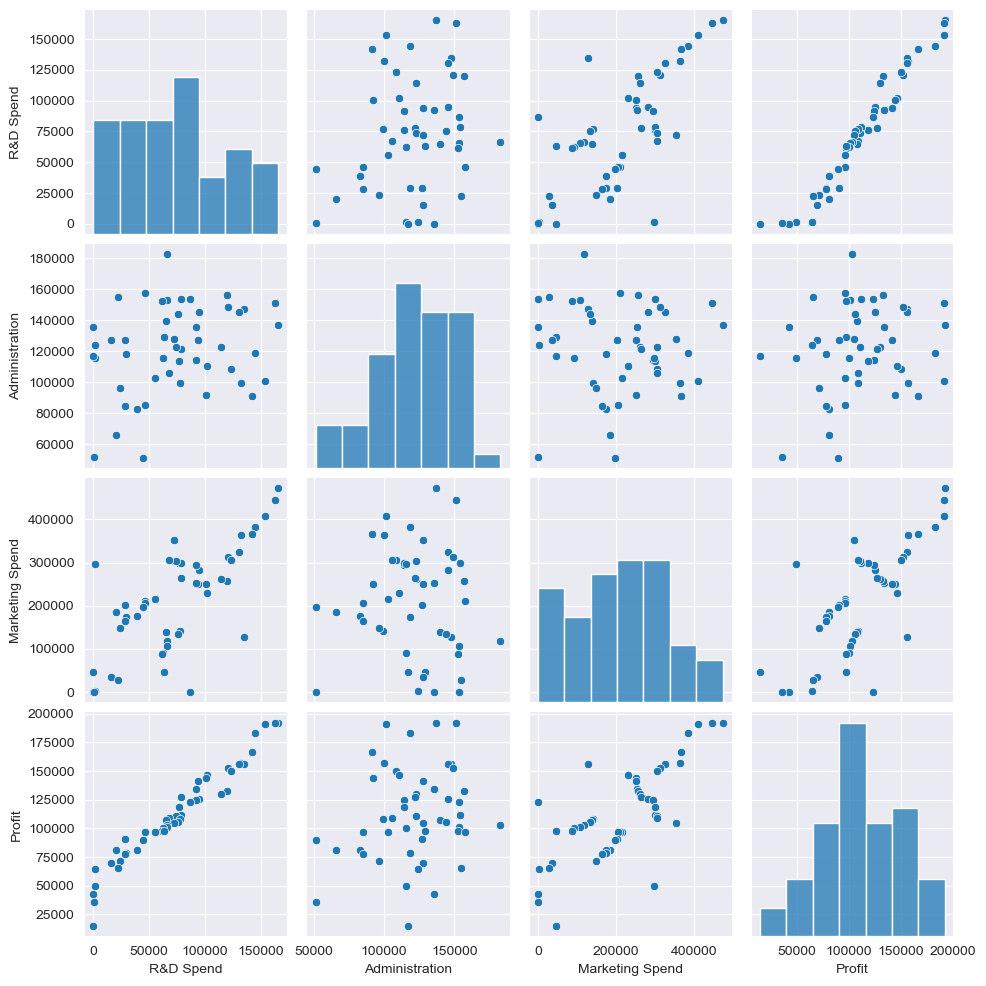

In [13]:
sns.set_style(style="darkgrid")
sns.pairplot(df)

In [14]:
# Renaming the columns 

df1=df.rename({"R&D Spend":"RDS","Administration":"ADMN","Marketing Spend":"MS"},axis=1)

In [15]:
df1

,RDS,ADMN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Building

In [16]:
model=smf.ols("Profit~RDS+ADMN+MS",data=df1).fit()

In [17]:
model

#  Model Testing

In [18]:
# Co-efficient of model

model.params

Intercept    50122.192990
RDS              0.805715
ADMN            -0.026816
MS               0.027228
dtype: float64

In [19]:
#Summary of model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        15:44:50   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMN          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Since the p value for Administration and Marketing Spend is > 0.05 building the  simple linear regression and multi linear regression models  to see insignificant variables


In [21]:
slr_adm=smf.ols("Profit~ADMN",data=df1).fit()

In [22]:
slr_adm

In [23]:
slr_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.162
Time:                        15:44:50   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADMN           0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Building the simple linear model to check the column Marketing State.

slr_mar=smf.ols("Profit~MS",data=df1).fit()

slr_mar



In [25]:
slr_mar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.38e-10
Time:                        15:44:50   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Building the Multi Linear regression model of Adminstration and Marketing together to check for collinearity problem


In [27]:
slr_am=smf.ols("Profit~ADMN+MS",data=df1).fit()

In [28]:
slr_am

In [29]:
slr_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           2.50e-10
Time:                        15:44:50   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADMN           0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation Techniques

# Two Techniques

# 1) Collinearity Check - VIF

# 2) Residual Analysis

# Calculating Variance Inflation Factor (VIF) = 1/1-r^2



In [30]:
rsq_rds=smf.ols("RDS~ADMN+MS",data=df1).fit().rsquared
vif_rds=1/(1-rsq_rds)
vif_rds

2.468903069994701

In [31]:
rsq_adm=smf.ols("ADMN~RDS+MS",data=df1).fit().rsquared
vif_adm=1/(1-rsq_adm)
vif_adm

1.175091007055045

In [32]:
rsq_ms=smf.ols("MS~RDS+ADMN",data=df1).fit().rsquared

vif_ms=1/(1-rsq_ms)
vif_ms

2.3267732905308773

In [33]:
# Sorting the values 

d1={"Variables":["RDS","ADM","MKS"],"VIF":[vif_rds,vif_adm,vif_ms]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

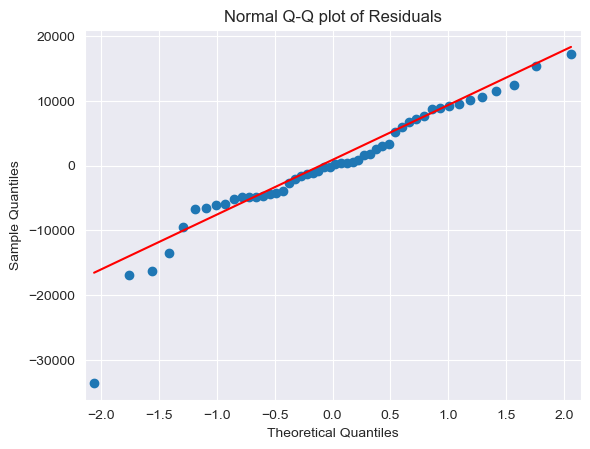

In [34]:
import statsmodels.api as sm
sns.set_style(style="darkgrid")
qqplot=sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of Residuals")
plt.show()

In [35]:
list(np.where(model.resid<-10000))

# Residual Plot for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

[array([14, 15, 48, 49], dtype=int64)]

In [36]:
def get_standardized_values (vals):
    return (vals-vals.mean())/vals.std()


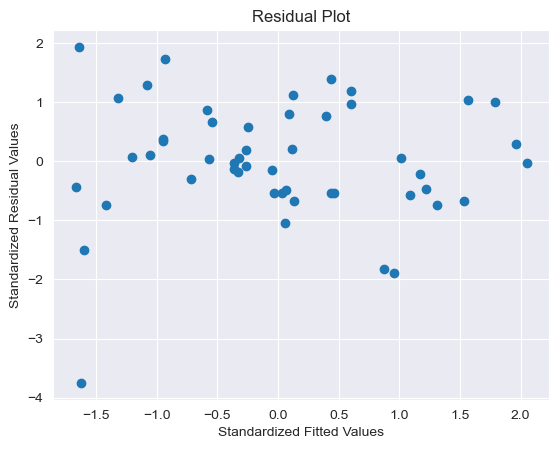

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

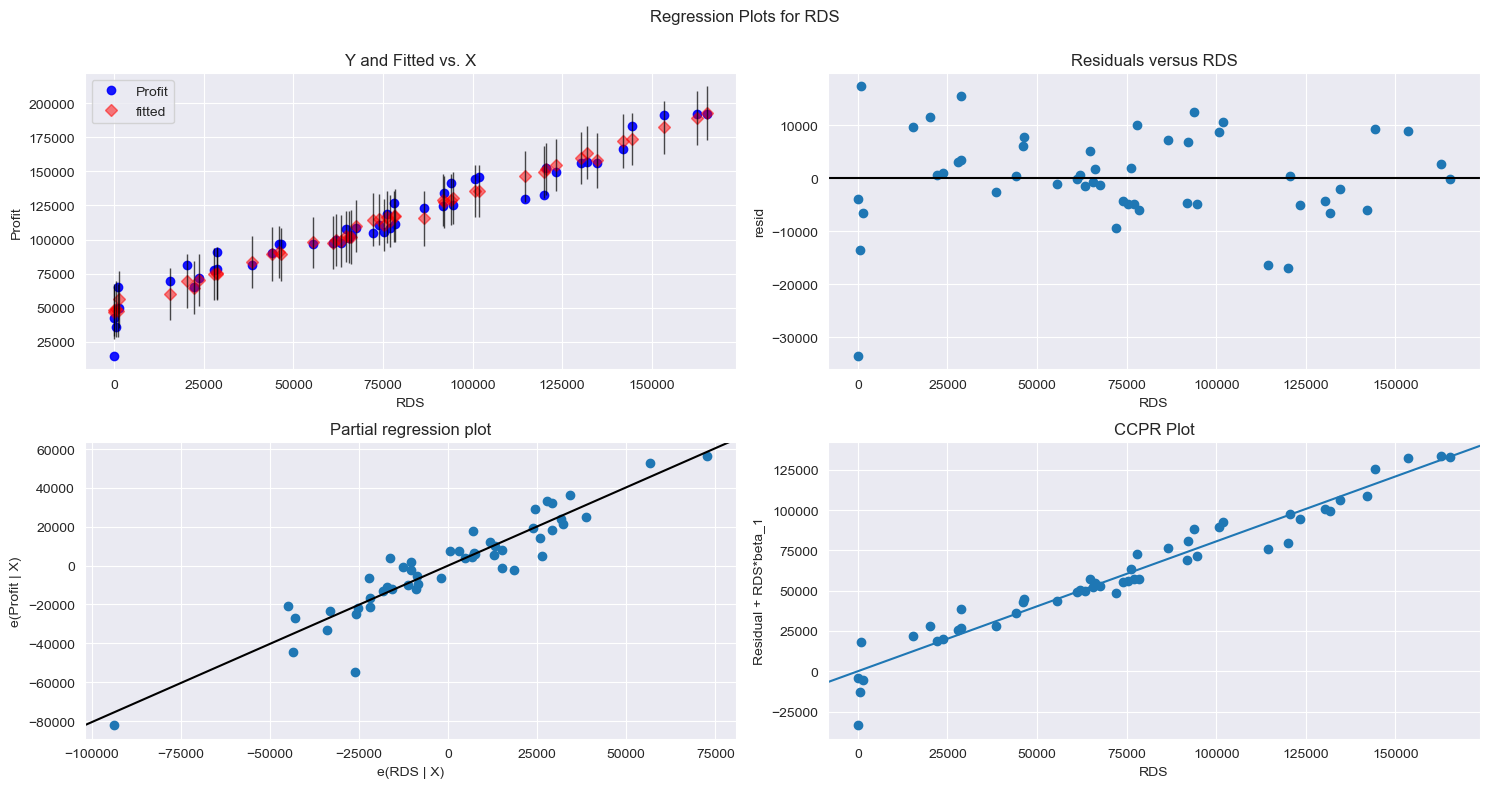

In [38]:
# Regression Plots for RDS

fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()

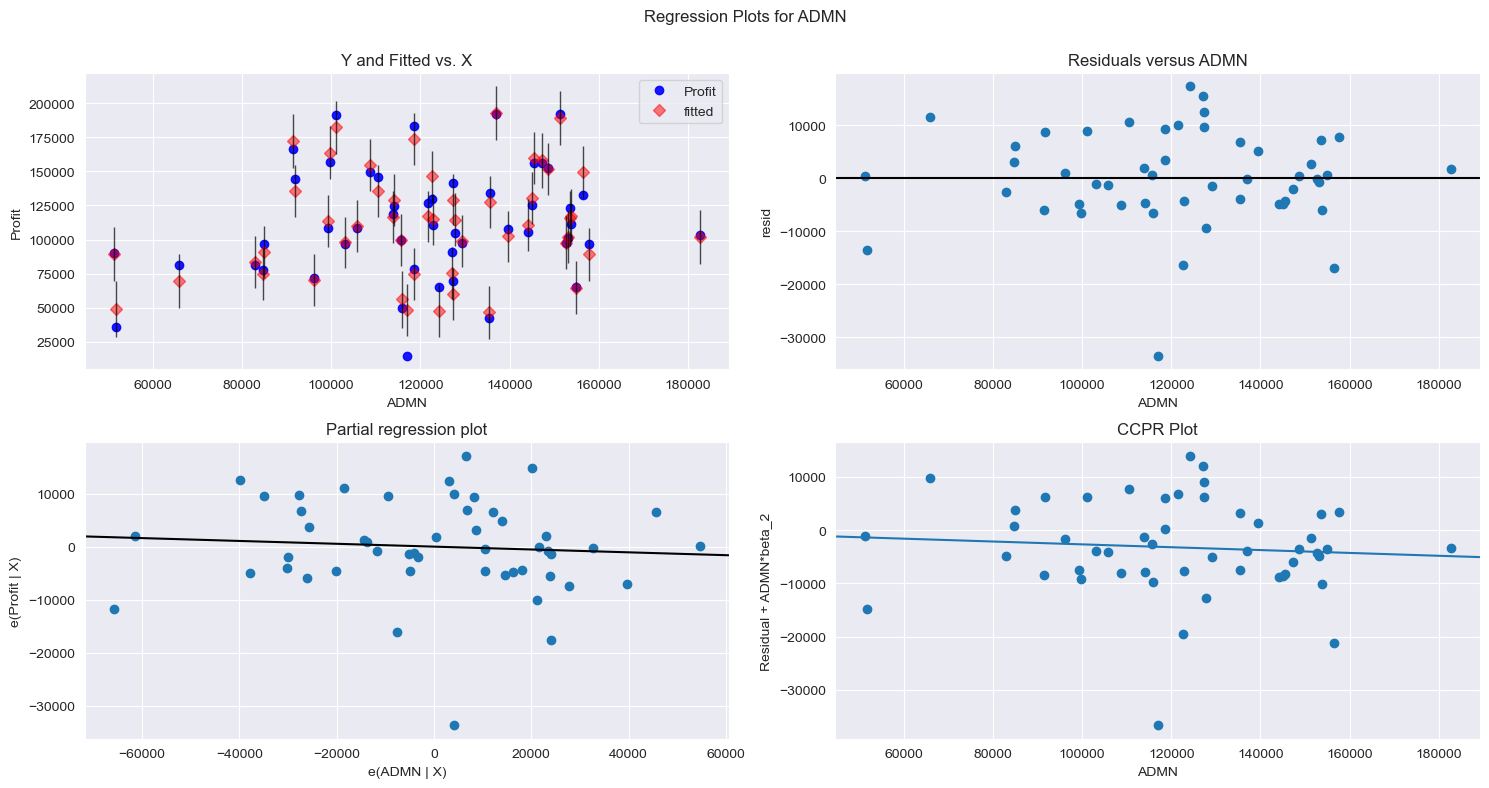

In [39]:
# Regression Plots for ADMN

fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"ADMN",fig=fig)
plt.show()



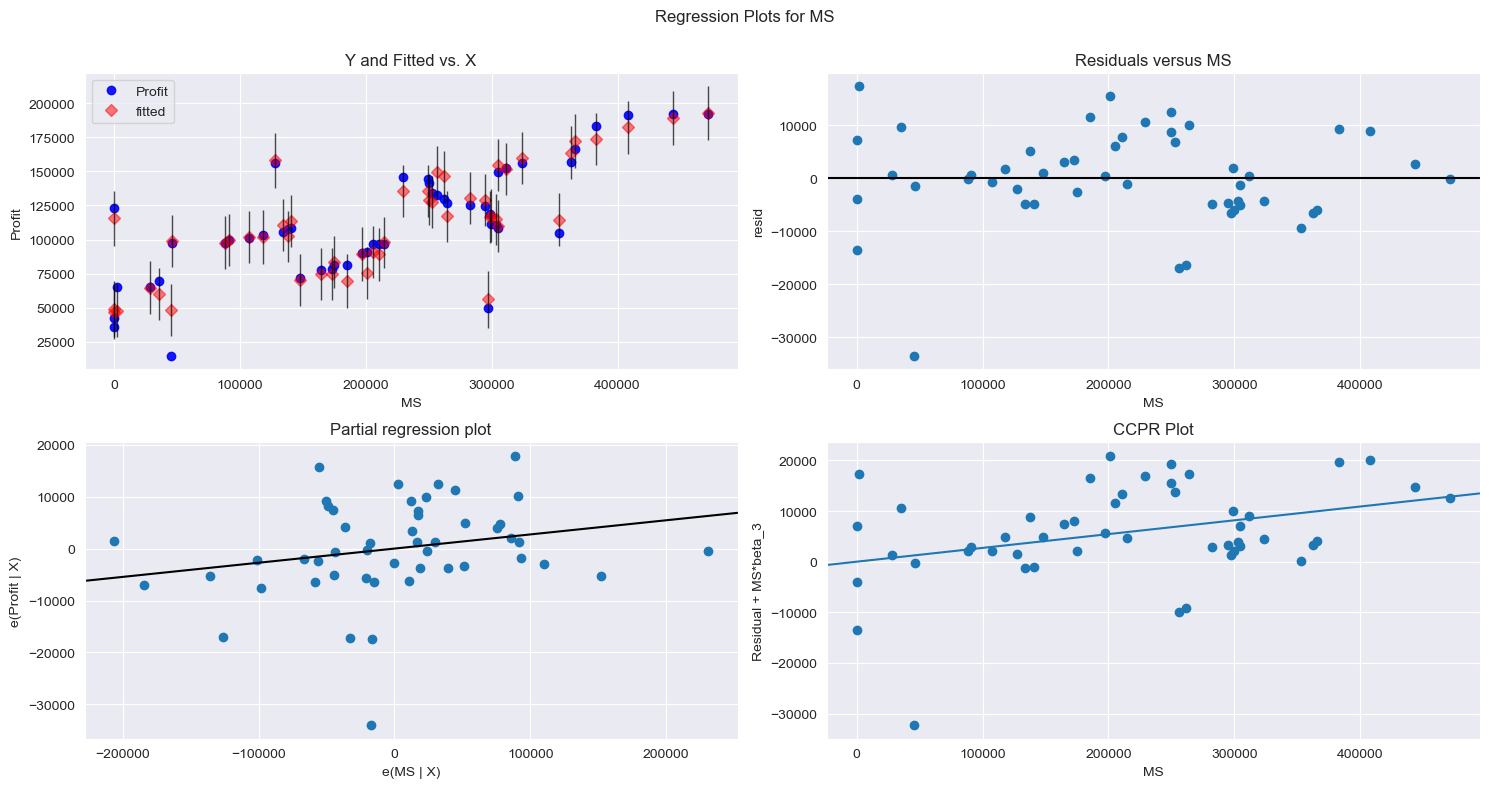

In [40]:
# Regression Plots for MS

fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influuencers / Outliers

# Cooks Distance

In [41]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

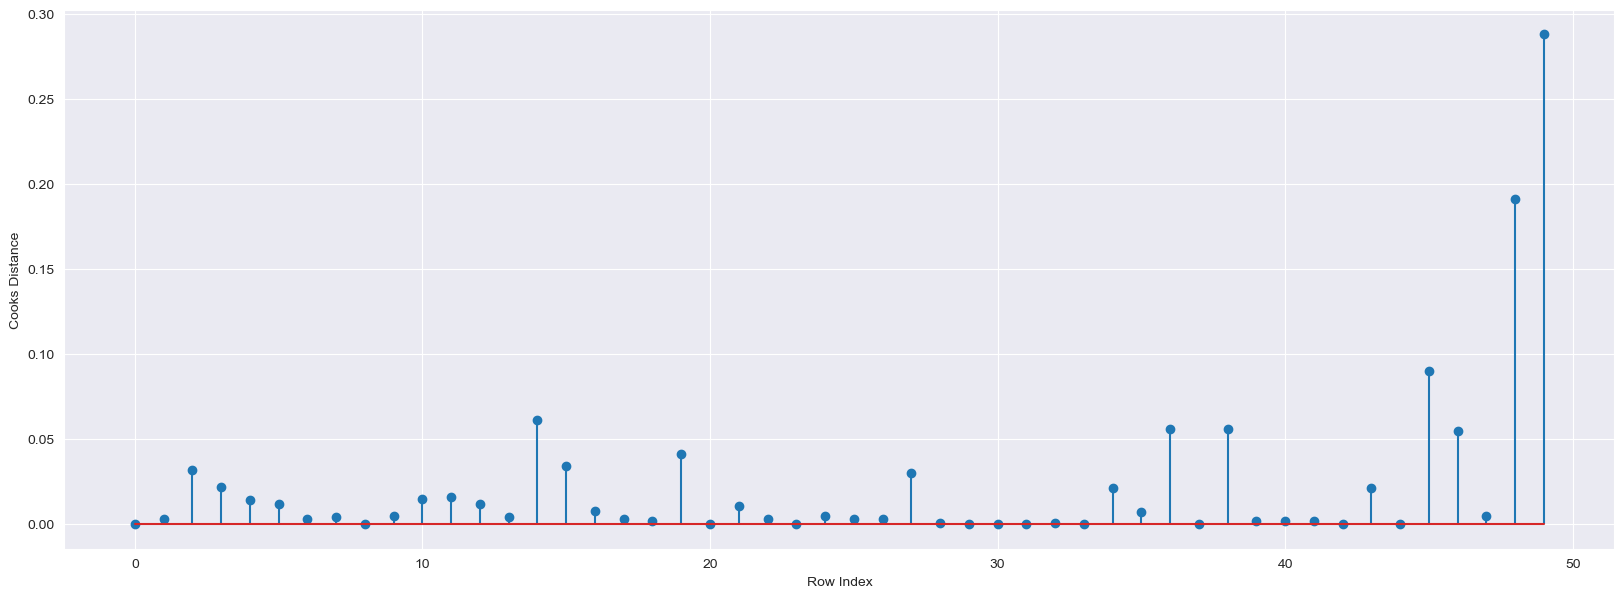

In [42]:
# Plotting the influencers values using the stem plot

sns.set_style(style="darkgrid")
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

#  High Influence Points

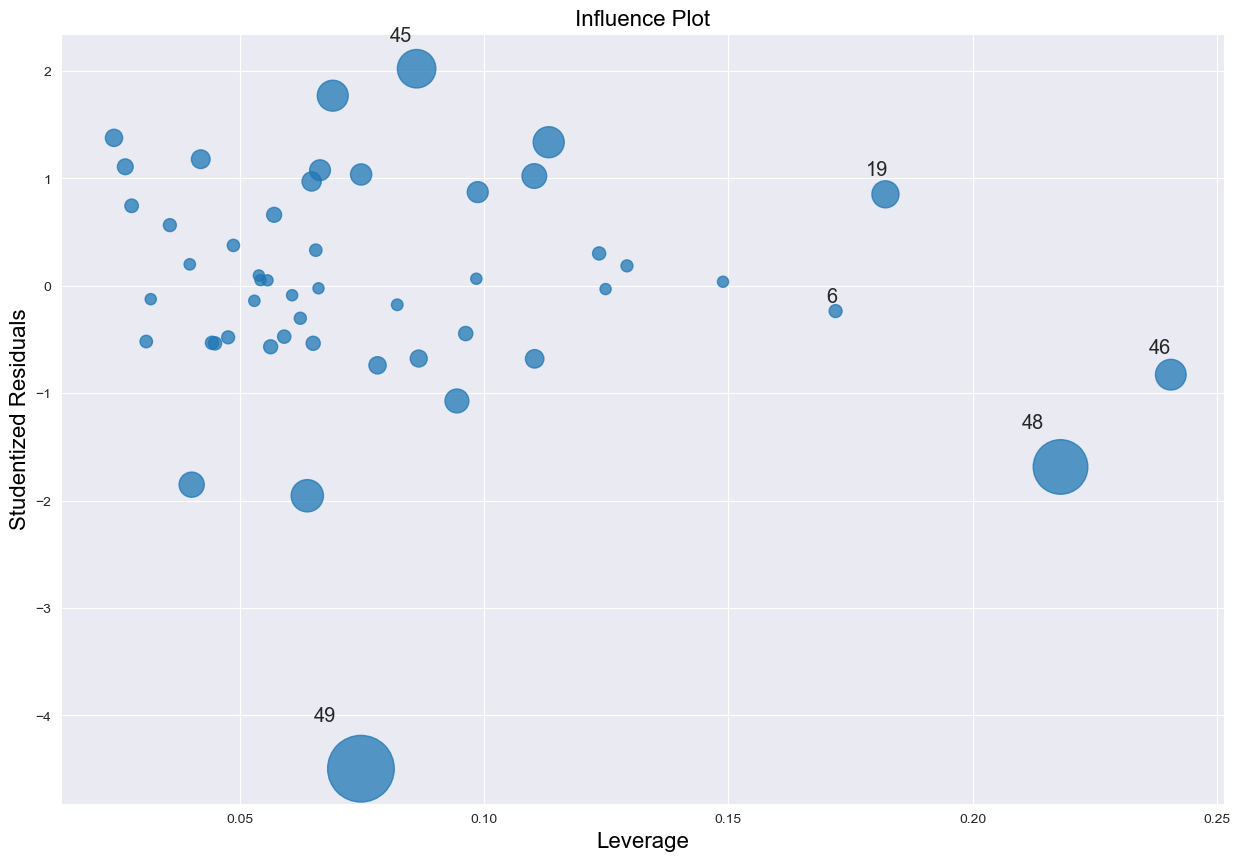

In [43]:
fig,ax=plt.subplots(figsize=(15,10))
fig=influence_plot(model,ax=ax)

In [44]:
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.36

In [45]:
df1[df1.index.isin([49])]

,RDS,ADMN,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [46]:
df1.shape

(50, 5)

#  Improving the model

In [47]:
#Discard the data points which are influencers and reasign the row number (reset_index())

df2=df1.copy()
df2

,RDS,ADMN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [48]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))

df2=df1.drop(df1.index[[49]],axis=0).reset_index(drop=True)
df2

,RDS,ADMN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#  Model Deletion Diagnostics and Final model

In [49]:
final_model=smf.ols("Profit~RDS+ADMN+MS",data=df2).fit()

In [50]:
final_model

In [51]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           8.85e-32
Time:                        15:45:00   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADMN          -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Predictions

In [52]:
# New data for predictions

In [53]:
new_data=pd.DataFrame({'RDS':78000,'ADMN':127864.55,"MS":249839.44},index=[1])
new_data

,RDS,ADMN,MS
1,78000,127864.55,249839.44


In [54]:
# Manual Prediction

final_model.predict(new_data)

1    116922.172202
dtype: float64

In [60]:
# Automatic Prediction

pred_y=final_model.predict(df2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [64]:
Prepared_Models = pd.DataFrame({'Model': ['final_model'], 'index': [1]})
new_data = pd.DataFrame({'Model': ['new_model'], 'index': [2]})

merged_data = pd.merge(Prepared_Models, new_data, on='index')
print(merged_data)

Empty DataFrame
Columns: [Model_x, index, Model_y]
Index: []


In [65]:
d2={'Prepared_Models':['Model','final_model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prepared_Models,Rsquared
0,Model,0.950746
1,final_model,0.961316
